In [20]:
#df = pd.read_csv('googleplaystore_cleaned.csv')
df = pd.read_csv('2_new.csv')
df.tail()

Unnamed: 0             Category  Rating   reviews  Size    Installs  \
10834       10834               FAMILY     4.5      38.0  53.0      5000.0   
10835       10835               FAMILY     5.0       4.0   3.6       100.0   
10836       10836              MEDICAL     0.0       3.0   9.5      1000.0   
10837       10837  BOOKS_AND_REFERENCE     4.5     114.0  37.0      1000.0   
10838       10838            LIFESTYLE     4.5  398307.0  19.0  10000000.0   

       Type  Price Content Rating             Genres         pri_genres  \
10834   0.0    0.0       Everyone          Education          Education   
10835   0.0    0.0       Everyone          Education          Education   
10836   0.0    0.0       Everyone            Medical            Medical   
10837   0.0    0.0     Mature 17+  Books & Reference  Books & Reference   
10838   0.0    0.0       Everyone          Lifestyle          Lifestyle   

              sec_genres Current_Ver  Ver_Mon  Ver_Year  And_1st_Ver  \
10834          Education        1.48      7.0    2017.0          4.0   
10835          Education         1.0      7.0    2018.0          4.0   
10836            Medical         1.0      1.0    2017.0          2.0   
10837  Books & Reference       1.0.0      1.0    2015.0         11.0   
10838          Lifestyle       1.0.0      7.0    2018.0         11.0   

       And_Last_Ver  
10834          11.0  
10835          11.0  
10836          11.0  
10837          11.0  
10838          11.0

count    1.083900e+04
mean     1.546577e+07
std      8.503315e+07
min      0.000000e+00
25%      3.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


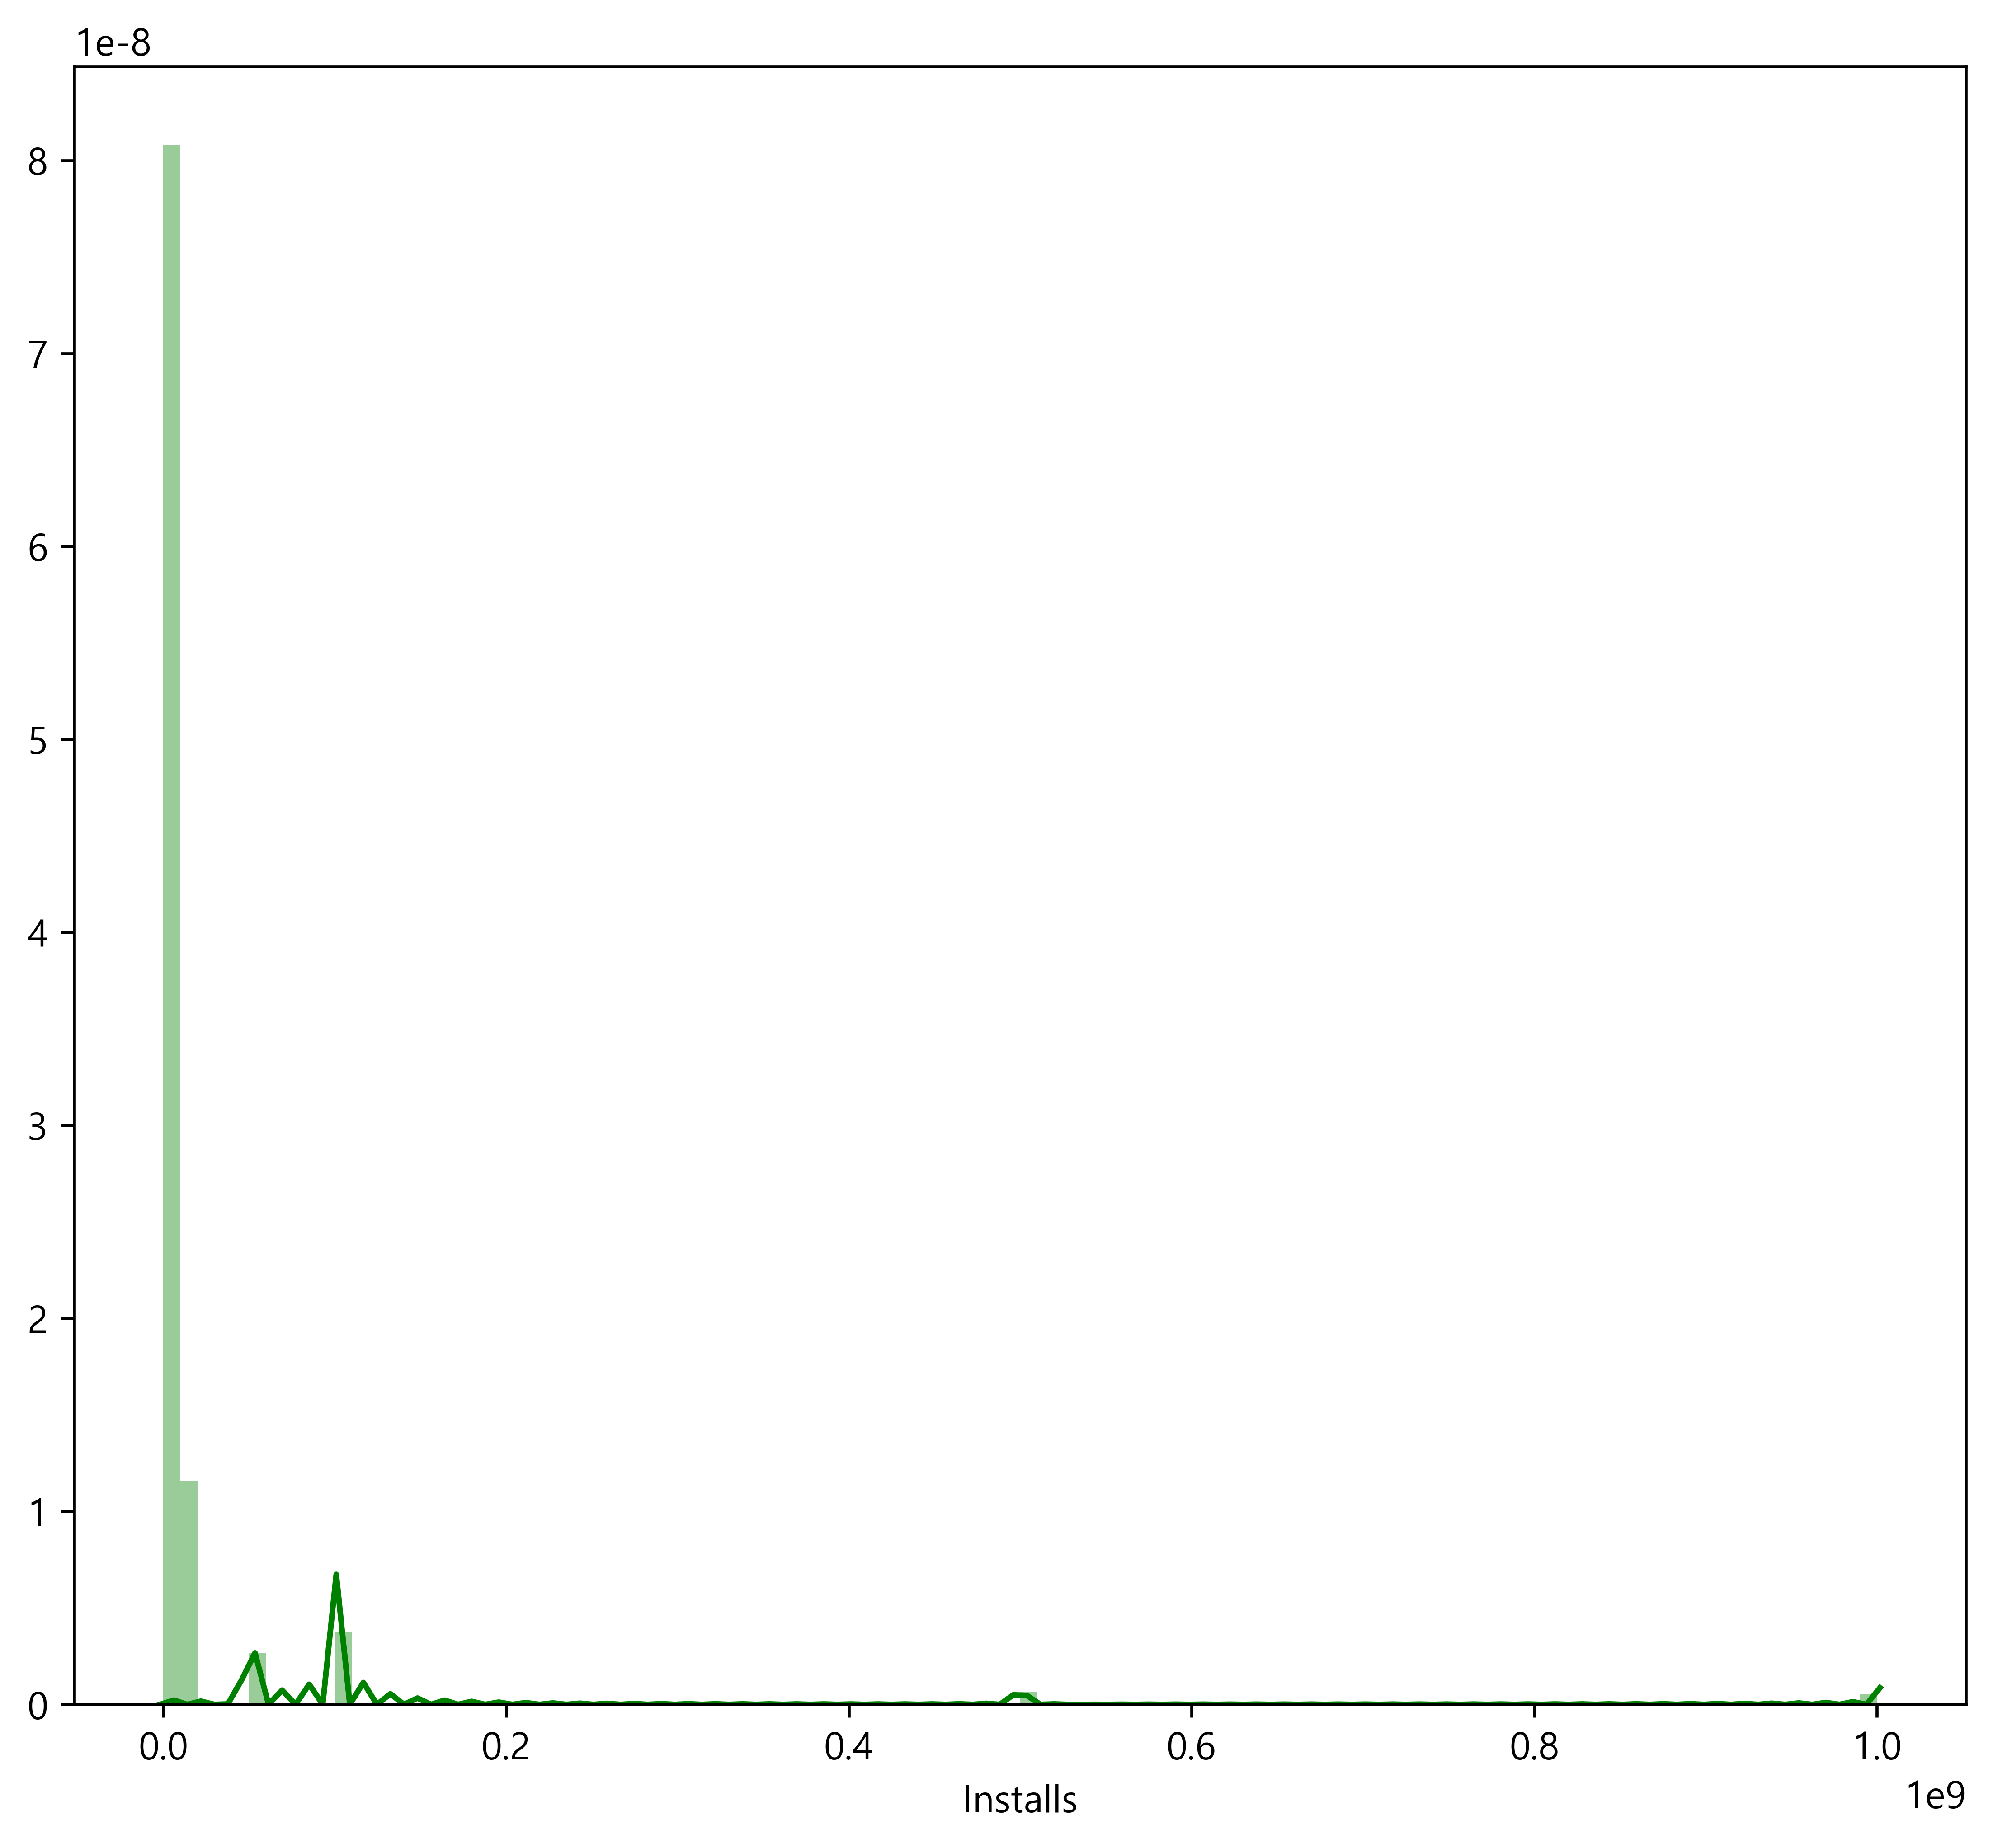

In [21]:
# the distribution of the Installs
print(df['Installs'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Installs'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [22]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [34]:
# float64와 int64로 이루어진 데이터 타입 확인
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Unnamed: 0  Rating   reviews  Size    Installs  Type  Price  Ver_Mon  \
0           0     4.1     159.0  19.0     10000.0   0.0    0.0      1.0   
1           1     3.9     967.0  14.0    500000.0   0.0    0.0      1.0   
2           2     4.7   87510.0   8.7   5000000.0   0.0    0.0      8.0   
3           3     4.5  215644.0  25.0  50000000.0   0.0    0.0      6.0   
4           4     4.3     967.0   2.8    100000.0   0.0    0.0      6.0   

   Ver_Year  And_1st_Ver  And_Last_Ver  
0    2018.0          4.0          11.0  
1    2018.0          4.0          11.0  
2    2018.0          4.0          11.0  
3    2018.0          4.0          11.0  
4    2018.0          4.0          11.0

### Install 기준 분석

In [35]:
col = ['Rating', 'reviews', 'Size', 'Type', 'Price', 'Ver_Mon', 'Ver_Year', 'And_1st_Ver', 'And_Last_Ver', 'Installs']
df_1 = df[col]
df_1.tail(1)

Rating   reviews  Size  Type  Price  Ver_Mon  Ver_Year  And_1st_Ver  \
10838     4.5  398307.0  19.0   0.0    0.0      7.0    2018.0         11.0   

       And_Last_Ver    Installs  
10838          11.0  10000000.0

In [36]:
df_1.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8);

육안으로 도드라지게 확인되는 관계가 보이지 않아 correlation 계산

In [37]:
df_1_corr = df_1.corr()['Installs'][:-1] # 마지막 col이 Install이라 -1까지만
features_list = df_1_corr[abs(df_1_corr) > 0].sort_values(ascending=False)
print("The following are the top {} strongly correlated values with Installs:\n{}".format(len(features_list), features_list))

The following are the top 9 strongly correlated values with Installs:
reviews         0.643121
And_1st_Ver     0.229019
Ver_Year        0.089378
Rating          0.084611
Ver_Mon         0.056445
Size            0.007329
And_Last_Ver    0.000174
Price          -0.011691
Type           -0.051043
Name: Installs, dtype: float64


하지만 correlation을 구해본 결과, Review를 제외한 나머지 feature들은 굉장히 낮은 연관성을 보인다.

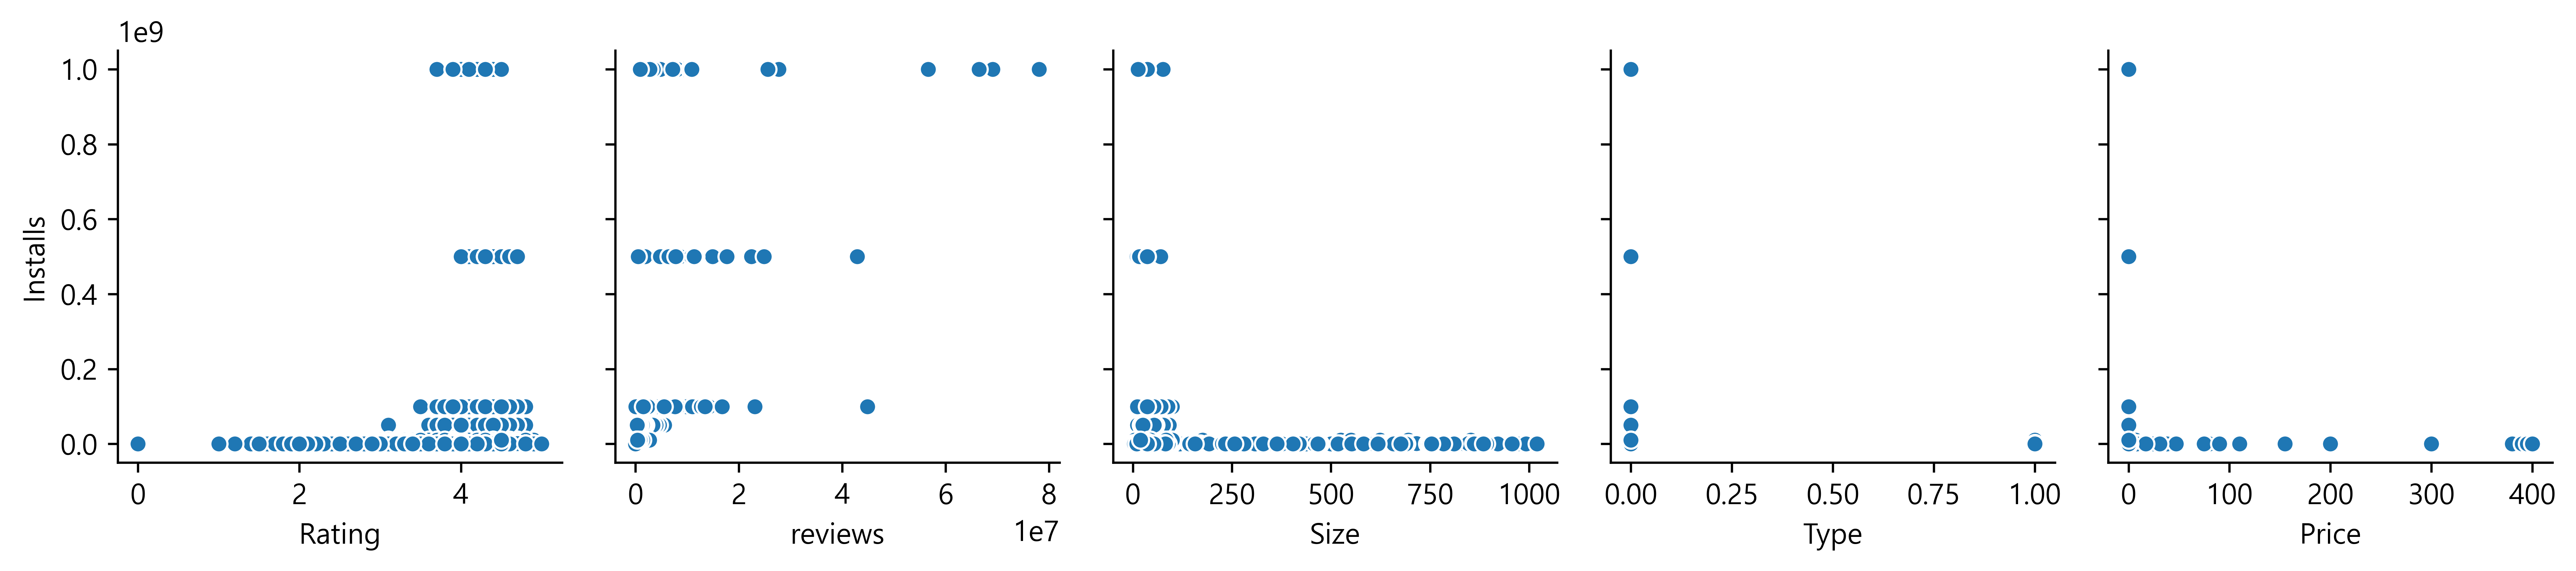

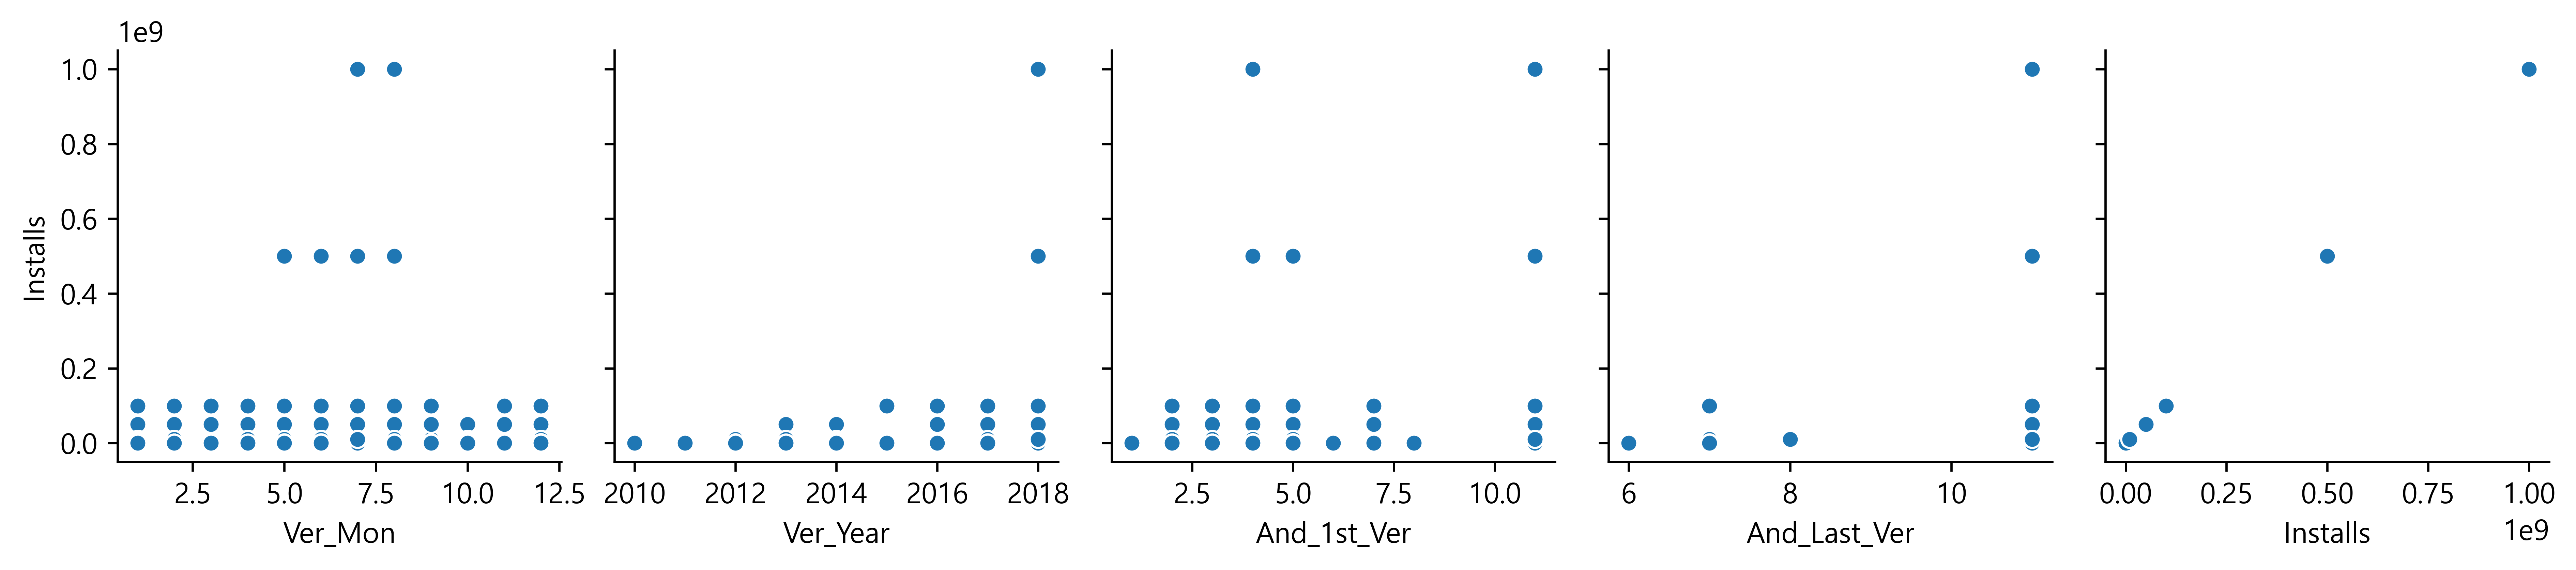

In [50]:
for i in range(0, len(df_1.columns), 5):
    sns.pairplot(data=df_1,
                 x_vars=df_1.columns[i:i+5],
                 y_vars=['Installs']
                )

### Review 기준 분석

In [38]:
col2 = ['Rating', 'Size', 'Installs', 'Type', 'Price', 'Ver_Mon', 'Ver_Year', 'And_1st_Ver', 'And_Last_Ver', 'reviews']
df_2 = df[col2]
df_2.tail(1)

Rating  Size    Installs  Type  Price  Ver_Mon  Ver_Year  And_1st_Ver  \
10838     4.5  19.0  10000000.0   0.0    0.0      7.0    2018.0         11.0   

       And_Last_Ver   reviews  
10838          11.0  398307.0

In [40]:
df_2_corr = df_2.corr()['reviews'][:-1]
features_list = df_2_corr[abs(df_2_corr) > 0].sort_values(ascending=False)
print("The following are the top {} strongly correlated values with Reviews:\n{}".format(len(features_list), features_list))

The following are the top 9 strongly correlated values with Reviews:
Installs        0.643121
And_1st_Ver     0.153553
Rating          0.078589
Ver_Year        0.075546
Ver_Mon         0.045928
Size            0.017263
And_Last_Ver    0.002867
Price          -0.009668
Type           -0.041703
Name: reviews, dtype: float64


Review도 Install과 마찬가지로 다른 feature들과 큰 correlation을 띄지 않았다.

And_1st Ver가 Install에서와 동일하게 가장 큰 correlation을 보였다.

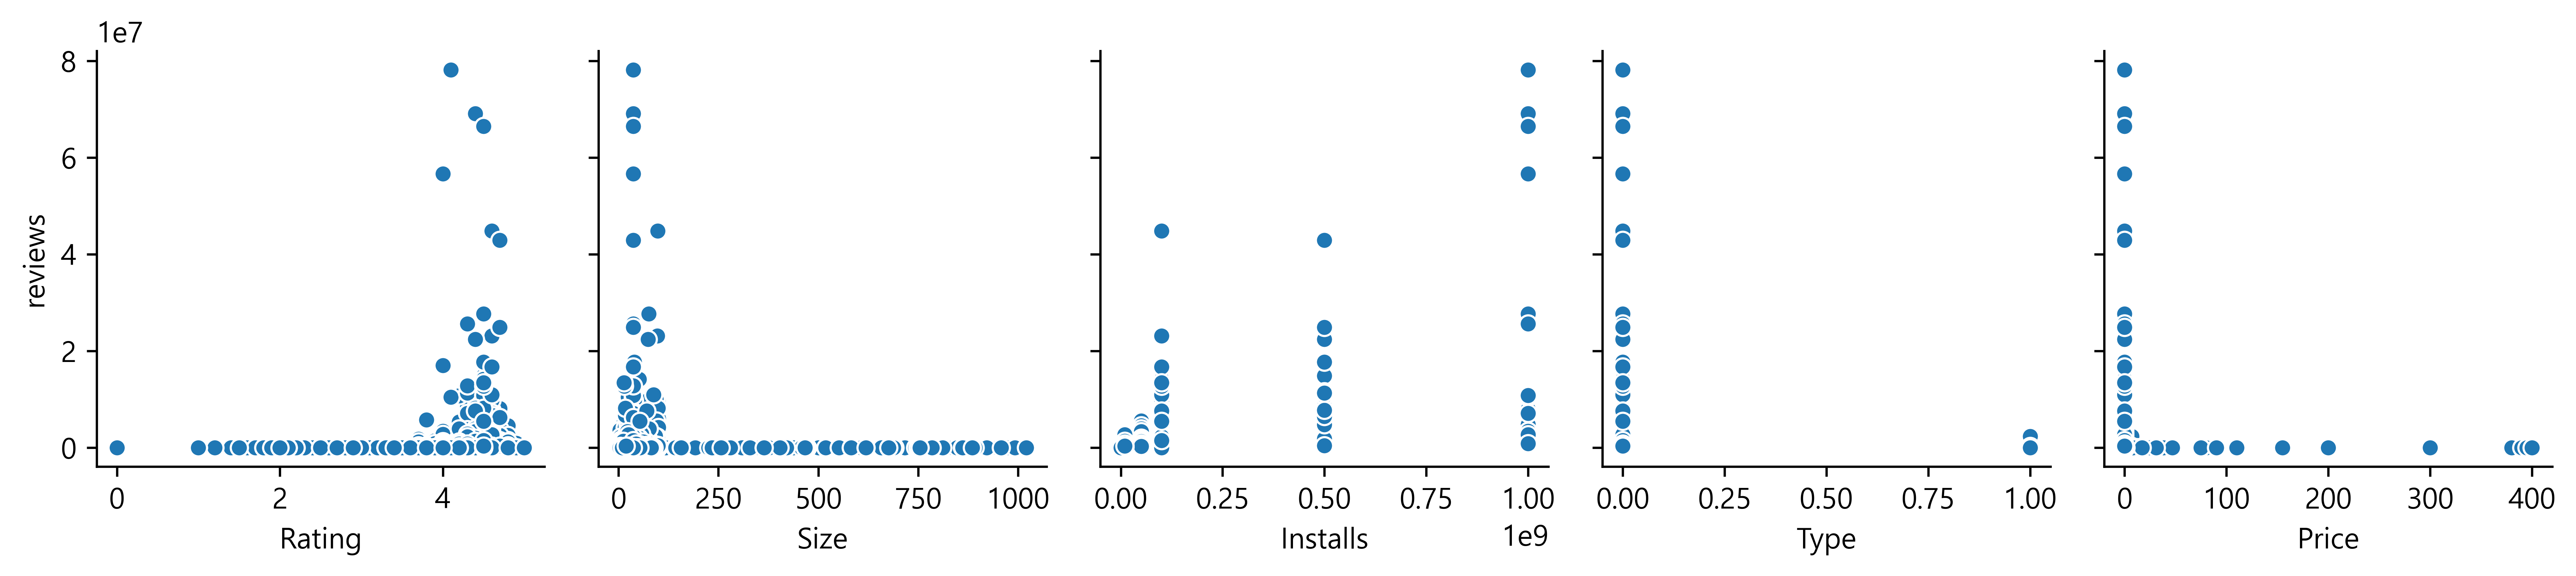

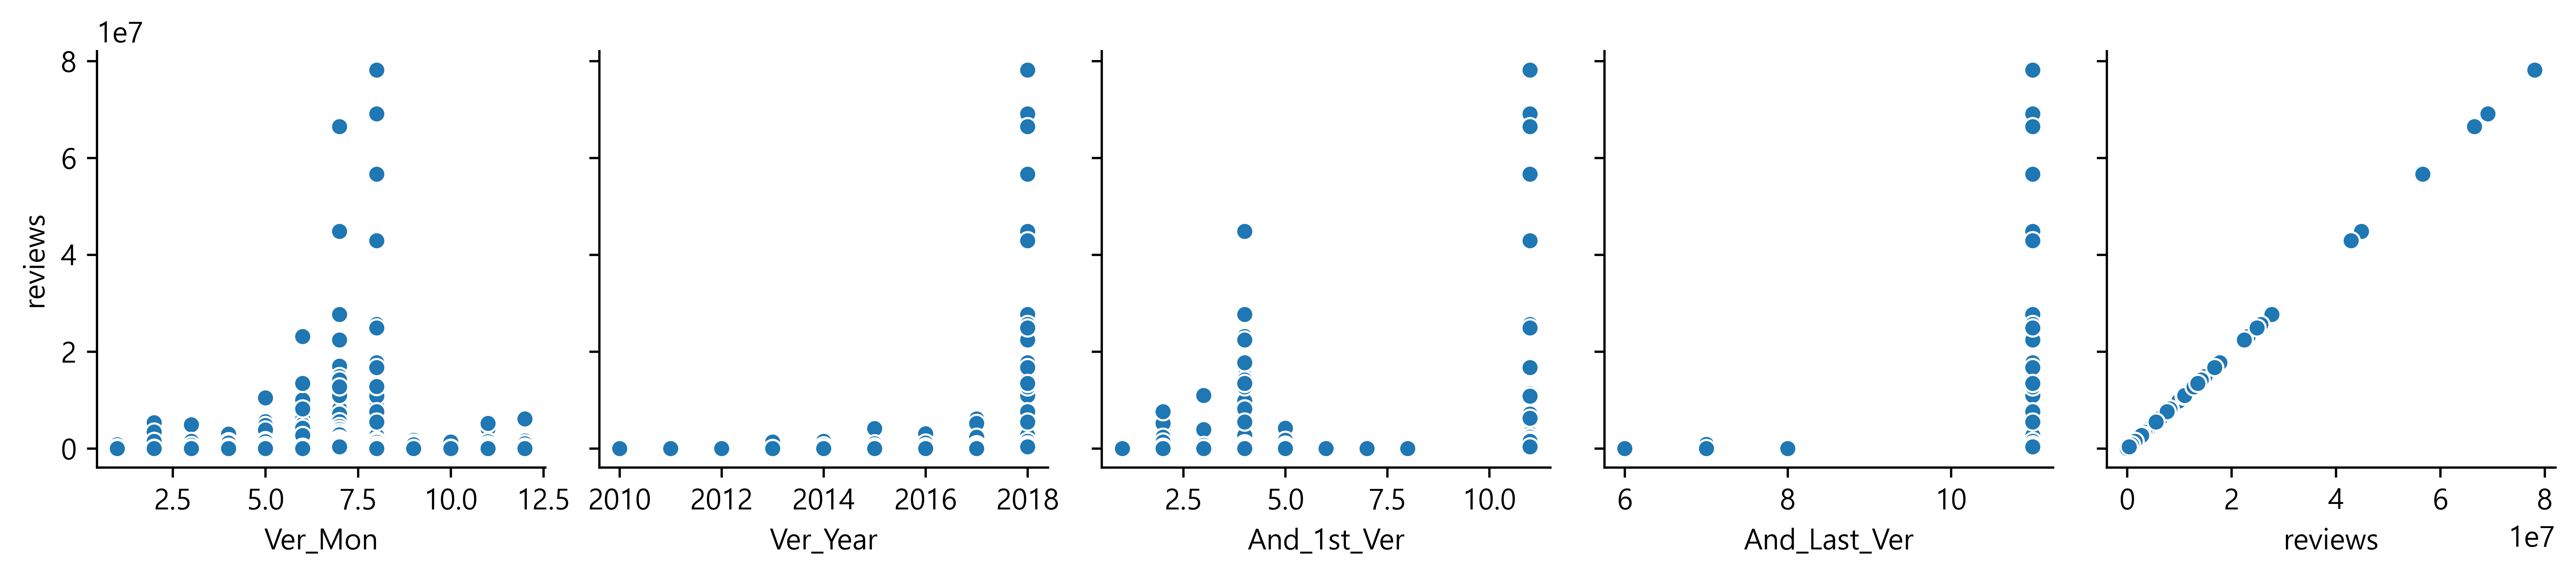

In [51]:
for i in range(0, len(df_2.columns), 5):
    sns.pairplot(data=df_2,
                 x_vars=df_2.columns[i:i+5],
                 y_vars=['reviews']
                )

### Rating 기준 분석

In [41]:
col3 = ['reviews', 'Size', 'Installs', 'Type', 'Price', 'Ver_Mon', 'Ver_Year', 'And_1st_Ver', 'And_Last_Ver', 'Rating']
df_3 = df[col3]
df_3.tail(1)

reviews  Size    Installs  Type  Price  Ver_Mon  Ver_Year  \
10838  398307.0  19.0  10000000.0   0.0    0.0      7.0    2018.0   

       And_1st_Ver  And_Last_Ver  Rating  
10838         11.0          11.0     4.5

In [43]:
df_3_corr = df_3.corr()['Rating'][:-1]
features_list = df_3_corr[abs(df_3_corr) > 0].sort_values(ascending=False)
print("The following are the top {} strongly correlated values with Rating:\n{}".format(len(features_list), features_list))

The following are the top 9 strongly correlated values with Rating:
And_1st_Ver     0.129238
Installs        0.084611
Ver_Year        0.084566
reviews         0.078589
Ver_Mon         0.031201
And_Last_Ver    0.005011
Size            0.000395
Price          -0.016365
Type           -0.031970
Name: Rating, dtype: float64


Rating은 And_1st_Ver과 가장 큰 correlation을 보였다.

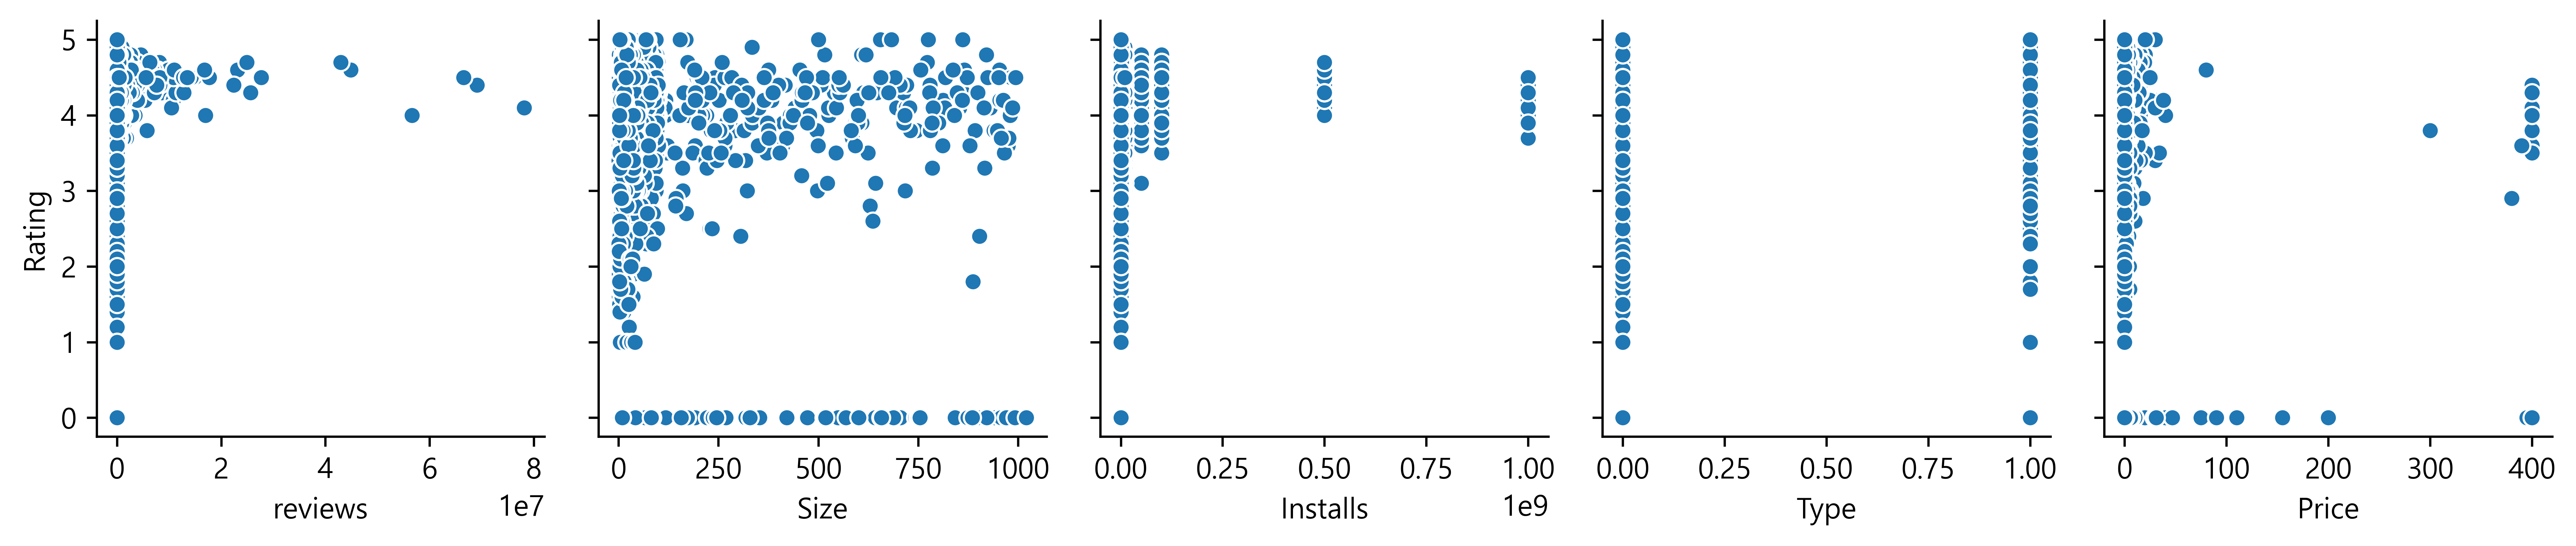

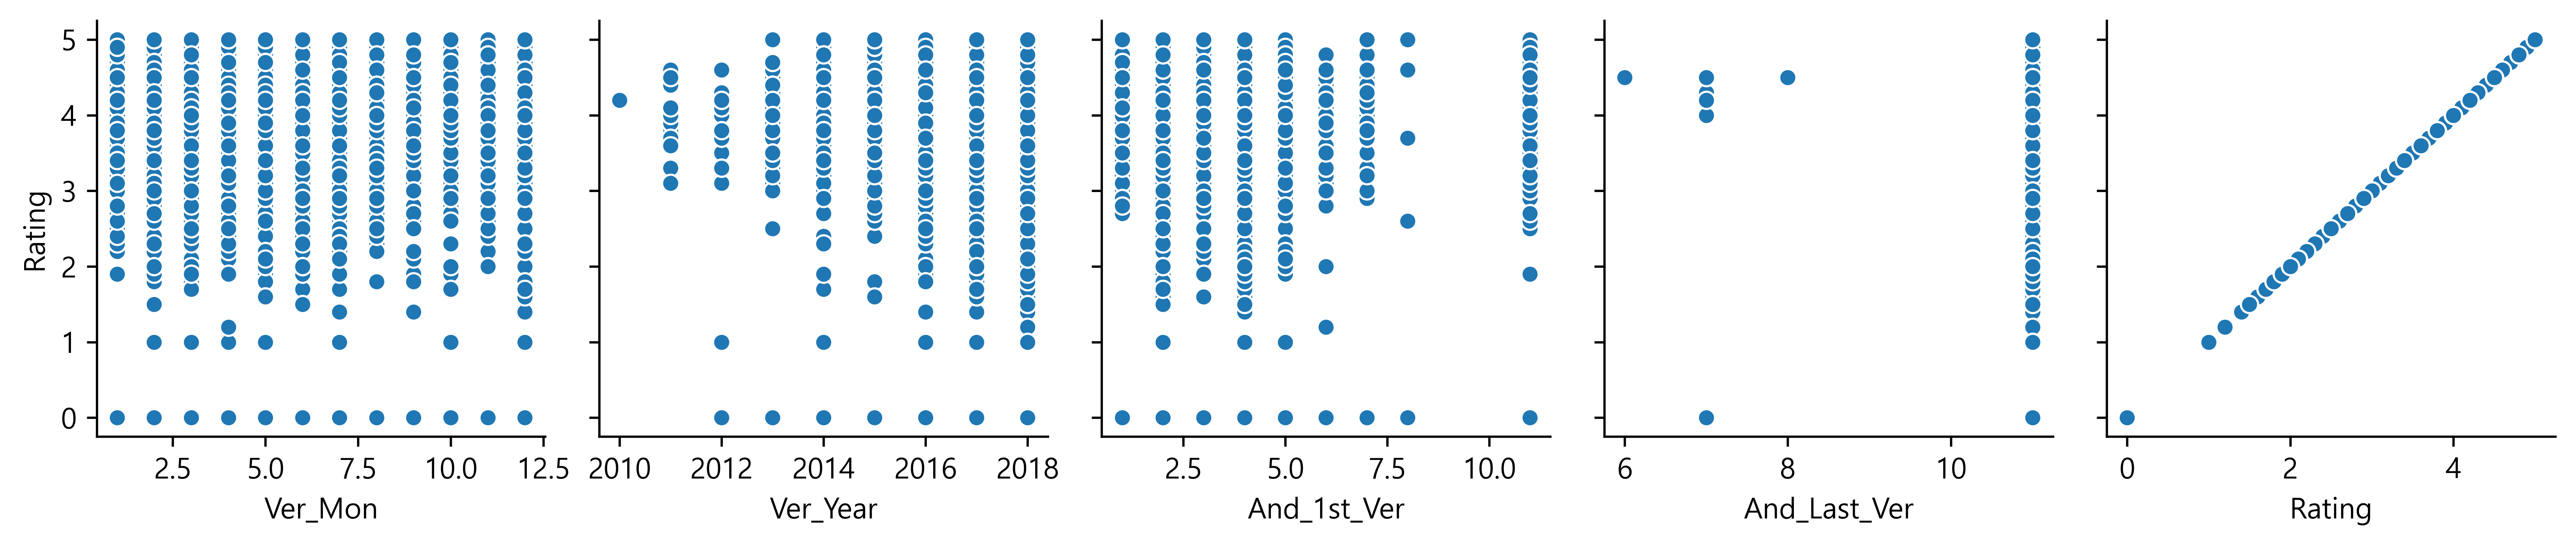

In [52]:
for i in range(0, len(df_3.columns), 5):
    sns.pairplot(data=df_3,
                 x_vars=df_3.columns[i:i+5],
                 y_vars=['Rating']
                )

### Price 기준 분석

In [44]:
col4 = ['Rating', 'reviews', 'Size', 'Installs', 'Type', 'Ver_Mon', 'Ver_Year', 'And_1st_Ver', 'And_Last_Ver', 'Price']
df_4 = df[col4]
df_4.tail(1)

Rating   reviews  Size    Installs  Type  Ver_Mon  Ver_Year  \
10838     4.5  398307.0  19.0  10000000.0   0.0      7.0    2018.0   

       And_1st_Ver  And_Last_Ver  Price  
10838         11.0          11.0    0.0

In [45]:
df_4_corr = df_4.corr()['Price'][:-1]
features_list = df_4_corr[abs(df_4_corr) > 0].sort_values(ascending=False)
print("The following are the top {} strongly correlated values with Price:\n{}".format(len(features_list), features_list))

The following are the top 9 strongly correlated values with Price:
Type            0.228199
Size            0.014491
Ver_Mon         0.006942
And_Last_Ver    0.001838
Ver_Year       -0.007894
reviews        -0.009668
Installs       -0.011691
Rating         -0.016365
And_1st_Ver    -0.016747
Name: Price, dtype: float64


Type은 0과 1로 이루어진 Free/Paid Column이므로 Price는 다른 feature들과 연관성이 없는 것으로 보임.

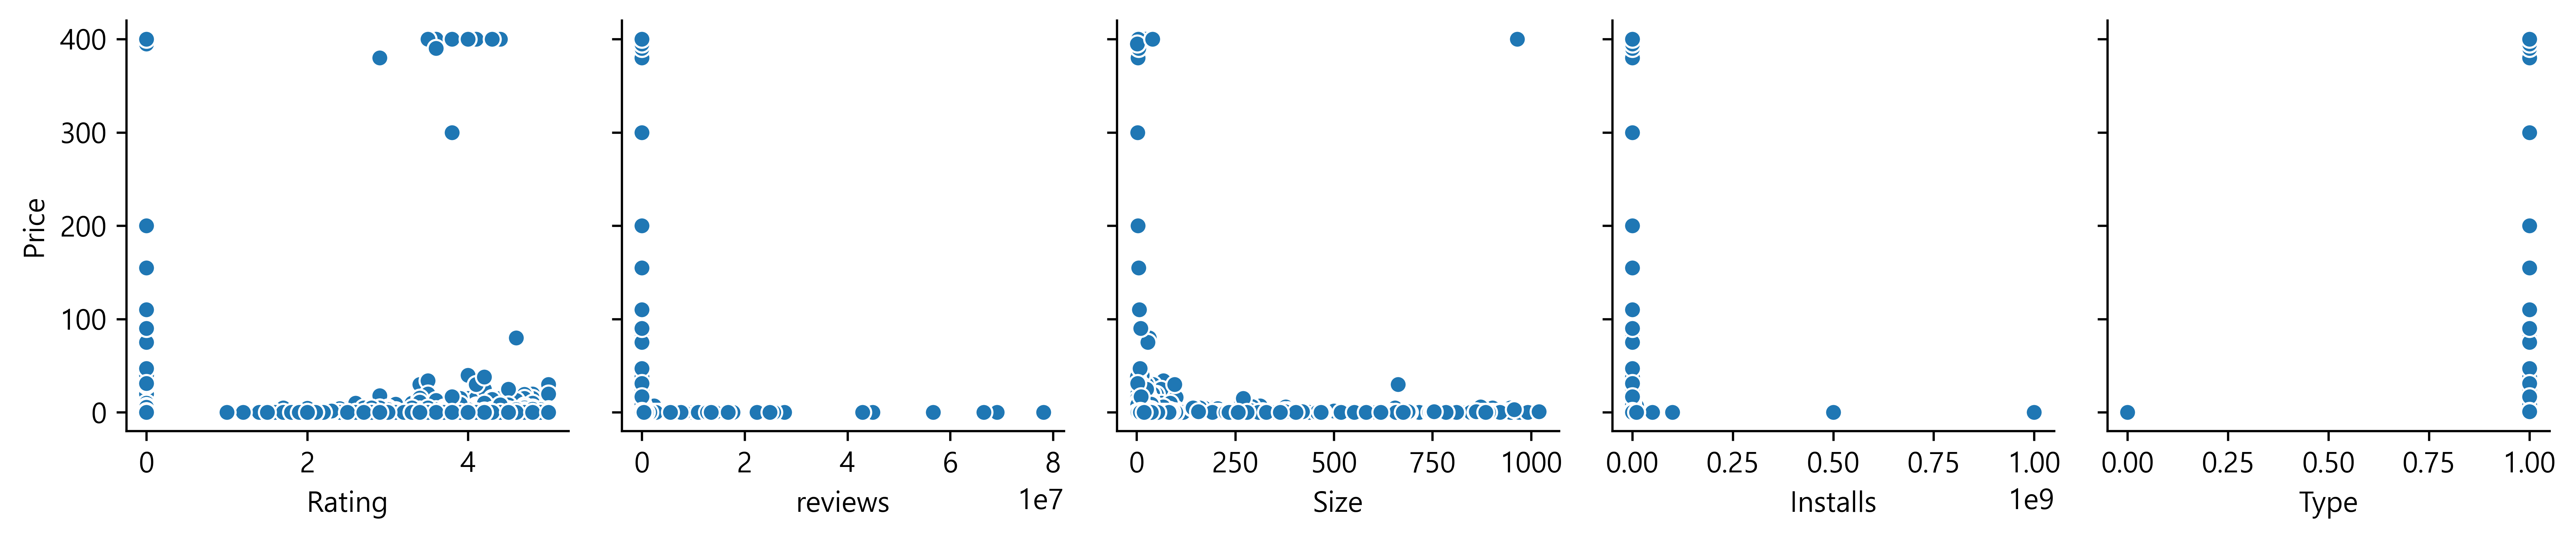

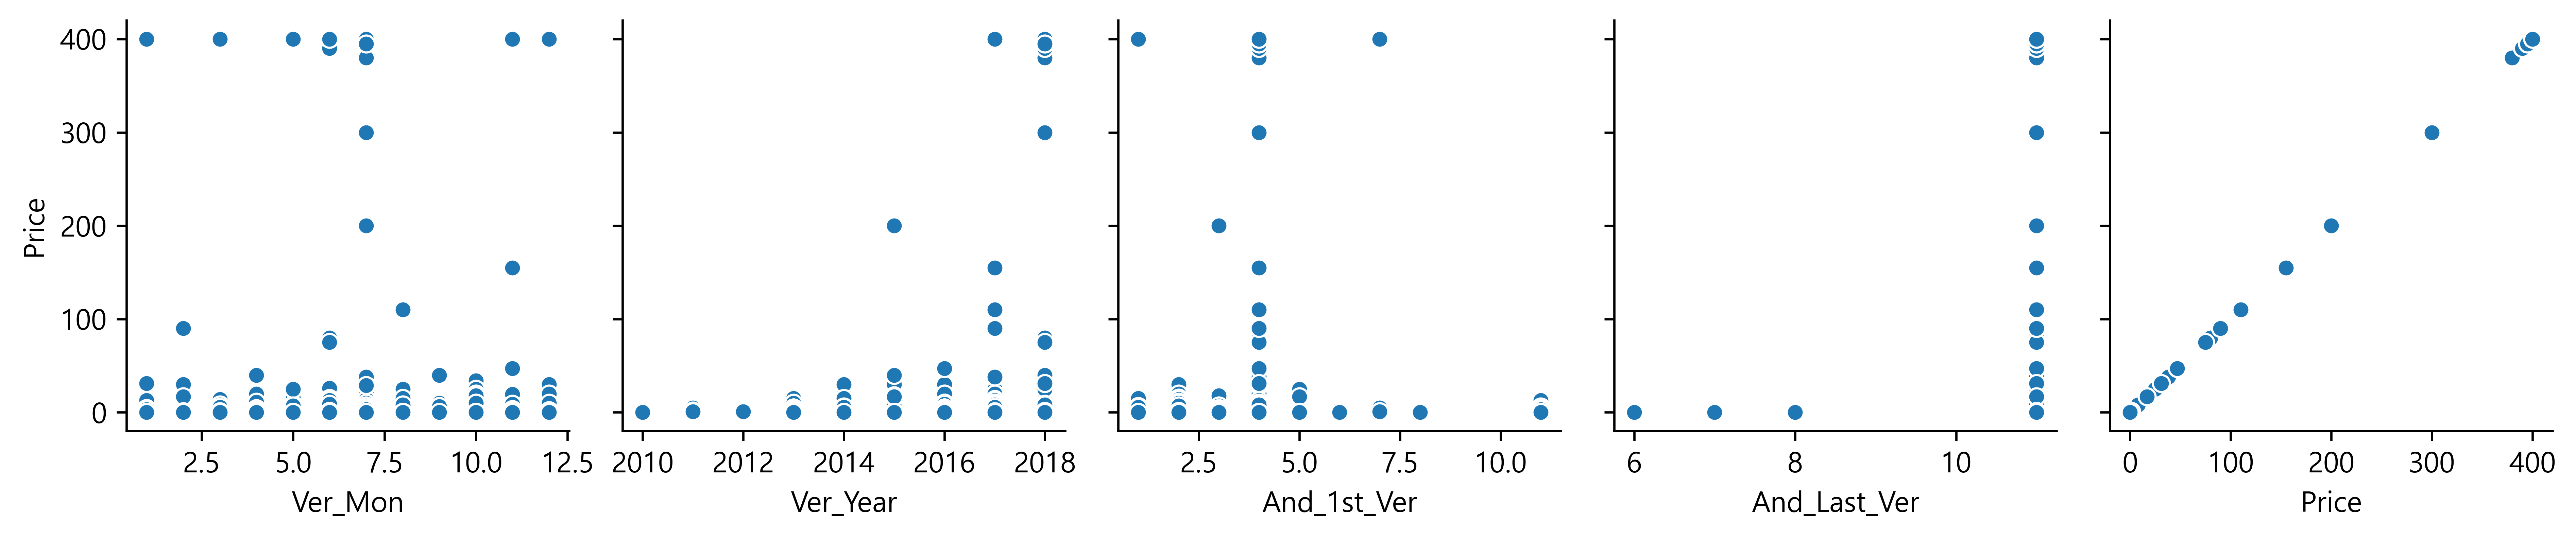

In [53]:
for i in range(0, len(df_4.columns), 5):
    sns.pairplot(data=df_4,
                 x_vars=df_4.columns[i:i+5],
                 y_vars=['Price']
                )

In [58]:
fig, ax = plt.subplots(round(len(col) / 3), 3, figsize= (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(col) - 1:
        sns.regplot(x = col[i], y='Installs', data=df_1[col], ax=ax)

In [65]:
sns.set(style="ticks", color_codes="True")
g = sns.pairplot(df_1, hue="Type")

C:\Users\Gk\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Gk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Gk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Gk\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


In [1]:
ns, _ = np.histogram(df['Installs'], bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}")

NameError: name 'df' is not defined